## An evaluation of a PlayStore Game Titles

### Table of Contents

<a href="#Descriptive-Statistics">Descriptive Statistics</a>

<a href="#Data-Preprocessing">Data Preprocessing</a>

<a href="#Exploratory-Analysis-and-Visualization">Exploratory Analysis and Visualization</a>

<a href="#Insights">Insights</a>

<a href="#Recommendations">Recommendations & Conclusion</a>

#### Problem Statement :

<p style='text-align: justify;'>There is a lot of competition for new game developers in the gaming industry, and getting discovered on the Play Store is difficult.Every day, thousands of new game developers decide to create new types of games, but in order to make a successful game, they must first study what players want and which types of games get the best user response.</p>

<p style='text-align: justify;'>Fresh graduate Game Developers want to learn more about the many game genres that are popular with consumers and gamers all around the world on Google Play so that they may focus their efforts on high-demand regions and boost their earning potential.</p>

#### About Data :

<p style='text-align: justify;'>The data collection includes each of the 17 game categories. This data set has over 1500 rows and 14 columns. All rating information is included for each game, as well as the number of users that have downloaded the game.</p>

 Data Source : https://www.kaggle.com/datasets/dhruvildave/top-play-store-games

### Packages, which are used in this project.

In [ ]:
!pip install rfpimp
!pip install category_encoders==2.4.0

In [2]:
import pandas 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from rfpimp import * 
from sklearn.preprocessing import LabelEncoder

## Descriptive Statistics

<p style='text-align: justify;'>Descriptive analysis is a type of data analysis that aids in the development of patterns that satisfy all of the data's requirements by explaining, showing, or summarising data points in a constructive manner. It is one of the most important steps in statistical data analysis.</p>

<p style='text-align: justify;'>Null values, numerical variables, outliers, distinct values, and so on. Mean, Median, Standard Deviation, number of rows/columns, null values, numerical variables, outliers, distinct values, and so on.</p>

### Load and Display the Dataset 

In [3]:
play_raw = pandas.read_csv(r"playstore_games_final.csv",encoding='latin1')
play = play_raw.copy()

### Generate descriptive statistics.such as mean, min, max, standard deviation, etc.

In [4]:
play_raw.describe()

,total_ratings,install_million,avg_rating,growth_30days,growth_60days,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price
count,1.565000e+03,1565.000000,1565.000000,1553.000000,1556.000000,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1565.000000
mean,1.129571e+06,32.566134,3.908626,346.624791,125.610347,8.092804e+05,1.226447e+05,6.026576e+04,2.888931e+04,1.084879e+05,0.010185
std,3.594120e+06,68.141854,0.290442,6337.718460,2344.141866,2.661120e+06,3.159710e+05,1.563826e+05,8.538533e+04,4.281821e+05,0.213092
min,3.299300e+04,1.000000,2.000000,0.000000,0.000000,1.397500e+04,2.471000e+03,7.180000e+02,3.780000e+02,6.170000e+02,0.000000
25%,2.053390e+05,10.000000,4.000000,0.100000,0.275000,1.400660e+05,2.258900e+04,1.074700e+04,4.859000e+03,1.460200e+04,0.000000
50%,4.552820e+05,10.000000,4.000000,0.500000,1.000000,3.115810e+05,5.349900e+04,2.675600e+04,1.158500e+04,3.650800e+04,0.000000
75%,9.133570e+05,50.000000,4.000000,1.800000,3.525000,6.488790e+05,1.063500e+05,5.366900e+04,2.452200e+04,8.592400e+04,0.000000
max,8.627313e+07,1000.000000,4.000000,227105.700000,69441.400000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07,7.490000


### Display number of rows/columns.

In [5]:
play_raw.shape

(1565, 14)

### Extract column name

In [6]:
play_raw.columns

Index(['title', 'total_ratings', 'install_million', 'avg_rating',
       'growth_30days', 'growth_60days', 'Category', '5_star_rating',
       '4_star_rating', '3_star_rating', '2_star_rating', '1_star_rating',
       'price', 'paid'],
      dtype='object')

### Check the number of nulls

In [7]:
play_raw.isnull().sum()

title               0
total_ratings       0
install_million     0
avg_rating          0
growth_30days      12
growth_60days       9
Category            0
5_star_rating       0
4_star_rating       0
3_star_rating       0
2_star_rating       0
1_star_rating       0
price               0
paid                0
dtype: int64

In [8]:
null_value = play_raw.isnull().sum()
null_value.index

Index(['title', 'total_ratings', 'install_million', 'avg_rating',
       'growth_30days', 'growth_60days', 'Category', '5_star_rating',
       '4_star_rating', '3_star_rating', '2_star_rating', '1_star_rating',
       'price', 'paid'],
      dtype='object')

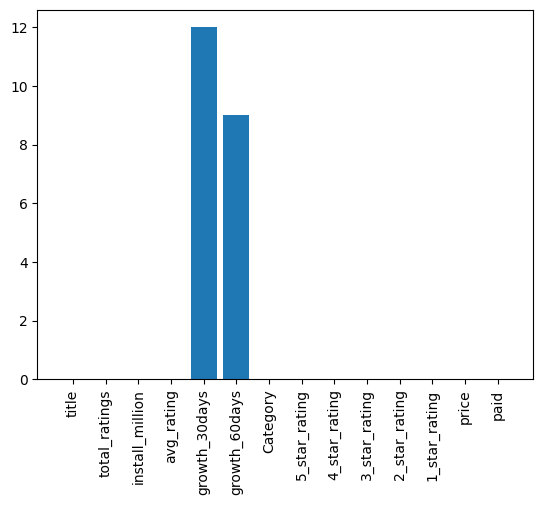

In [9]:
fig, ax = plt.subplots()
plt.bar(null_value.index,null_value,linewidth=1)
plt.xticks(rotation=90)
warnings.filterwarnings('ignore')

### Check data and datatype of each column

In [10]:
play_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1565 non-null   object 
 1   total_ratings    1565 non-null   int64  
 2   install_million  1565 non-null   int64  
 3   avg_rating       1565 non-null   int64  
 4   growth_30days    1553 non-null   float64
 5   growth_60days    1556 non-null   float64
 6   Category         1565 non-null   object 
 7   5_star_rating    1565 non-null   int64  
 8   4_star_rating    1565 non-null   int64  
 9   3_star_rating    1565 non-null   int64  
 10  2_star_rating    1565 non-null   int64  
 11  1_star_rating    1565 non-null   int64  
 12  price            1565 non-null   float64
 13  paid             1565 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 160.6+ KB


### Count the values in columns.

In [11]:
play_raw['Category'].value_counts()

Racing         100
Action         100
Casual         100
Arcade          97
Sports          97
Simulation      96
Educational     95
Adventure       95
Strategy        95
RolePlaying     94
Board           93
Puzzle          92
Casino          92
Music           91
Word            77
Trivia          76
Card            75
Name: Category, dtype: int64

### Show Top 10

In [12]:
play_raw['title'].value_counts().head(10)

Bubble Shooter                              4
Sudoku                                      2
The Simpsonsâ¢: Tapped Out                 2
Real Racing 3                               2
Quiz - Offline Games                        1
Disney Emoji Blitz                          1
Chess Royale: Play and Learn Free Online    1
Bus Simulator: Original                     1
Shipwrecked:Castaway Island                 1
Scary Teacher 3D                            1
Name: title, dtype: int64

### Numerical variable

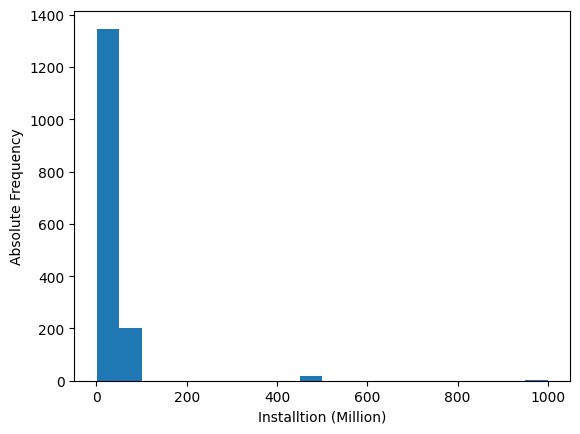

In [13]:
fig, ax = plt.subplots()
ax = plt.hist(play_raw.install_million, bins=20)
plt.xlabel("Installtion (Million)")
plt.ylabel("Absolute Frequency")
plt.show()

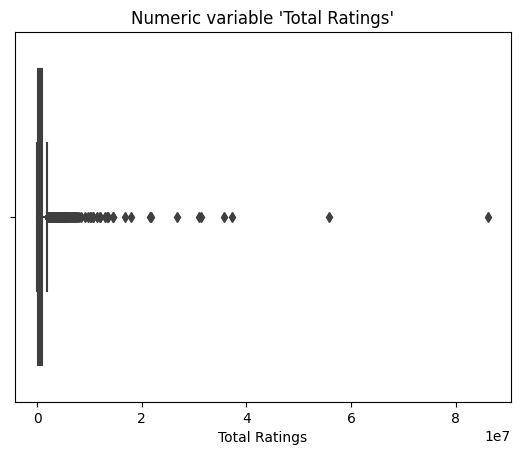

In [14]:
fig, ax = plt.subplots()
ax = sns.boxplot(x=play_raw['total_ratings'],orient="h").set(xlabel="Total Ratings", title="Numeric variable 'Total Ratings'");

### Is there any outliers present in dataset ?

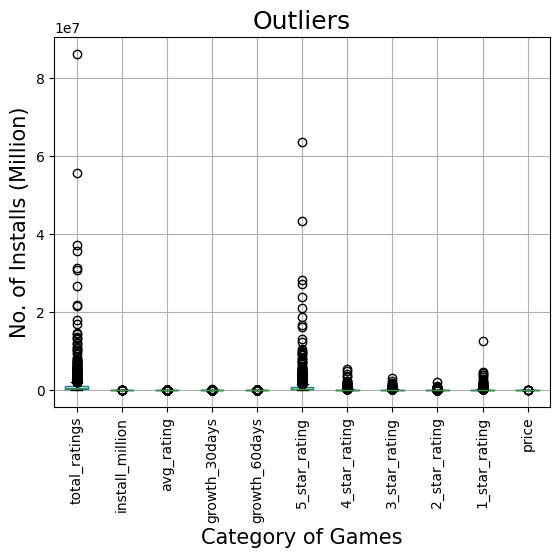

In [15]:
fig, ax = plt.subplots()
play_raw.boxplot(column=["total_ratings",	"install_million",	"avg_rating",	"growth_30days",	"growth_60days",		"5_star_rating",	"4_star_rating",	"3_star_rating",	"2_star_rating",	"1_star_rating",	"price"])
plt.xlabel("Category of Games", size = 15)
plt.ylabel("No. of Installs (Million)", size = 15)
plt.xticks(rotation=90)
plt.title("Outliers", size = 18)
plt.savefig("outliers.png")
plt.show()

### No. of Distinct Values with column name and its data type

In [16]:
feature_names=list(play_raw.columns)
pandas.DataFrame([[f, play_raw[f].dtype, play_raw[f].nunique()] for f in feature_names], 
              columns=['feature', 'type', 'distinct values'])

,feature,type,distinct values
0,title,object,1559
1,total_ratings,int64,1564
2,install_million,int64,7
3,avg_rating,int64,3
4,growth_30days,float64,182
5,growth_60days,float64,200
6,Category,object,17
7,5_star_rating,int64,1562
8,4_star_rating,int64,1559
9,3_star_rating,int64,1546


[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

## Data Preprocessing

In [17]:
#creating evalaute function for rf and oob
def evaluate(X, y, n_estimators=50):
    rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    n = rfnnodes(rf)
    h = np.median(rfmaxdepths(rf))
    print(f"OOB R^2 is {oob:.5f} using {n:,d} tree nodes with {h} median tree depth")
    return rf, oob

In [18]:
#for showing important features
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

In [19]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [20]:
sniff_modified(play_raw)

,data type,percent missing,No. unique,unique values
paid,bool,0.000000,2,"[False, True]"
total_ratings,int64,0.000000,1564,"[86273129, 55766763, 37276732, 35665901, 31367..."
install_million,int64,0.000000,7,"[500, 1000, 100, 50, 10, 5, 1]"
avg_rating,int64,0.000000,3,"[4, 3, 2]"
5_star_rating,int64,0.000000,1562,"[63546766, 43346128, 28339753, 27138572, 23837..."
4_star_rating,int64,0.000000,1559,"[4949507, 5404966, 2164478, 3366600, 4176798, ..."
3_star_rating,int64,0.000000,1546,"[3158756, 2276203, 1253185, 1622695, 1534041, ..."
2_star_rating,int64,0.000000,1526,"[2122183, 971321, 809821, 814890, 486005, 7770..."
1_star_rating,int64,0.000000,1555,"[12495915, 3768141, 4709492, 2723142, 1333650,..."
growth_30days,float64,0.766773,183,"[2.1, 0.3, 1.8, 0.5, 0.9, 0.4, 1.5, 2.6, 1.2, ..."


In [21]:
numfeatures= ['total_ratings','install_million','avg_rating','growth_30days']

<p style='text-align: justify;'>The practice of finding and repairing (or deleting) faulty or erroneous records from a record set is known as data cleaning or cleansing.Standardizing data sets, and repairing faults like empty fields, missing codes or finding duplicate data points, Fixing spelling and grammar issues, are all examples of data cleaning.</p>

### Displaying columns with its amount of missing values

In [22]:
def missing_cols(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(play_raw)

growth_30days => 12
growth_60days => 9


### Printing out columns with missing values with its %

In [23]:
def perc_missing(df):
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(play_raw)

growth_30days => 0.77%
growth_60days => 0.58%


### Visulaizing the missing value through HeatMap

<AxesSubplot: >

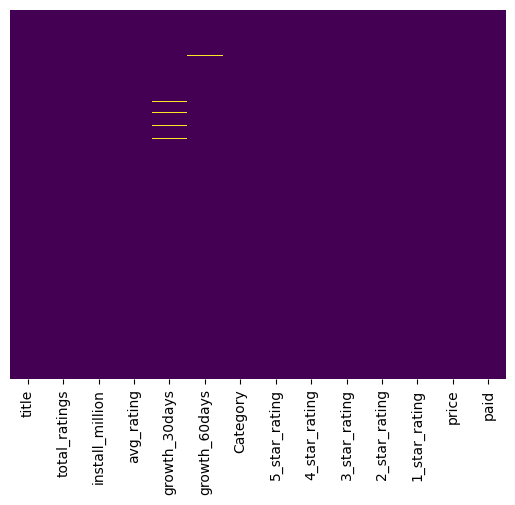

In [24]:

sns.heatmap(play_raw.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [25]:
#filling null values with zero
play_raw[numfeatures] = play[numfeatures].fillna(0)
play_raw['growth_60days'] = play_raw['growth_60days'].fillna(0)

In [26]:
#checking whether any value is null after filling with zero
play_raw[numfeatures].isnull().sum()

total_ratings      0
install_million    0
avg_rating         0
growth_30days      0
dtype: int64

#### Converting Categorical Data to Numerical Ones

In [30]:
cat_features = play.select_dtypes(include=[object])
cat_features.head()

,title,Category
0,Garena Free Fire- World Series,Action
1,Clash of Clans,Strategy
2,PUBG MOBILE,Action
3,Subway Surfers,Arcade
4,Candy Crush Saga,Casual


In [31]:
#getting unique values for categorical columns
for col in cat_features:
    print(f'{col} : {cat_features[col].unique()}')

title : ['Garena Free Fire- World Series' 'Clash of Clans' 'PUBG MOBILE ' ...
 'Muse Dash' 'Lanota - Dynamic & Challenging Music Game'
 'Berpacu Dalam Melody Indonesia']
Category : ['Action' 'Strategy' 'Arcade' 'Casual' 'Adventure' 'Sports' 'Racing'
 'Board' 'Trivia' 'Simulation' 'Puzzle' 'RolePlaying' 'Casino' 'Music'
 'Word' 'Card' 'Educational']


In [32]:
from pandas.api.types import is_categorical_dtype, is_string_dtype

def play_string_to_cat(play):
    for col in play.columns:
        if is_string_dtype(play[col]):
            play[col] = play[col].astype('category').cat.as_ordered()

def play_cat_to_catcode(play):
    for col in play.columns:
        if is_categorical_dtype(play[col]):
            play[col] = play[col].cat.codes + 1

In [33]:
play_string_to_cat(cat_features)
play_cat_to_catcode(cat_features)

In [34]:
sniff_modified(cat_features)

,data type,percent missing,No. unique,unique values
Category,int8,0.0,17,"[1, 15, 3, 7, 2, 14, 11, 4, 16, 13, 10, 12, 6,..."
title,int16,0.0,1559,"[538, 266, 970, 1267, 216, 265, 859, 1110, 1, ..."


In [35]:
num_features = play.select_dtypes(include=['int','float'])
num_features = num_features.fillna(num_features.mean())
num_features.head()

,total_ratings,install_million,avg_rating,growth_30days,growth_60days,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price
0,86273129,500,4,2.1,6.9,63546766,4949507,3158756,2122183,12495915,0.0
1,55766763,500,4,0.3,1.0,43346128,5404966,2276203,971321,3768141,0.0
2,37276732,500,4,1.8,3.6,28339753,2164478,1253185,809821,4709492,0.0
3,35665901,1000,4,0.5,1.0,27138572,3366600,1622695,814890,2723142,0.0
4,31367945,1000,4,0.9,1.6,23837448,4176798,1534041,486005,1333650,0.0


In [36]:
encoded_play = pd.concat([num_features,cat_features], axis=1)
encoded_play

,total_ratings,install_million,avg_rating,growth_30days,growth_60days,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price,title,Category
0,86273129,500,4,2.1,6.9,63546766,4949507,3158756,2122183,12495915,0.00,538,1
1,55766763,500,4,0.3,1.0,43346128,5404966,2276203,971321,3768141,0.00,266,15
2,37276732,500,4,1.8,3.6,28339753,2164478,1253185,809821,4709492,0.00,970,1
3,35665901,1000,4,0.5,1.0,27138572,3366600,1622695,814890,2723142,0.00,1267,3
4,31367945,1000,4,0.9,1.6,23837448,4176798,1534041,486005,1333650,0.00,216,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,34781,5,4,2.4,5.7,24705,4583,1947,838,2706,0.00,809,9
1561,34434,1,4,0.4,1.0,23468,3894,2256,998,3814,0.00,990,9
1562,34140,100,4,768.5,6.7,29210,2774,718,429,1007,1.49,894,9
1563,33173,1,4,0.8,1.9,26494,3628,1405,528,1116,0.00,741,9


In [37]:
#dropping 'conv_fuel' in x2 because it is our target variable and we will define it in y2.
x2 = encoded_play.drop(['growth_60days','price','5_star_rating',
       '4_star_rating', '3_star_rating', '2_star_rating', '1_star_rating',], axis=1)
y2 = encoded_play['growth_60days']

[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

## Exploratory Analysis and Visualization

### Displaying distinct ratings for various groups of games.

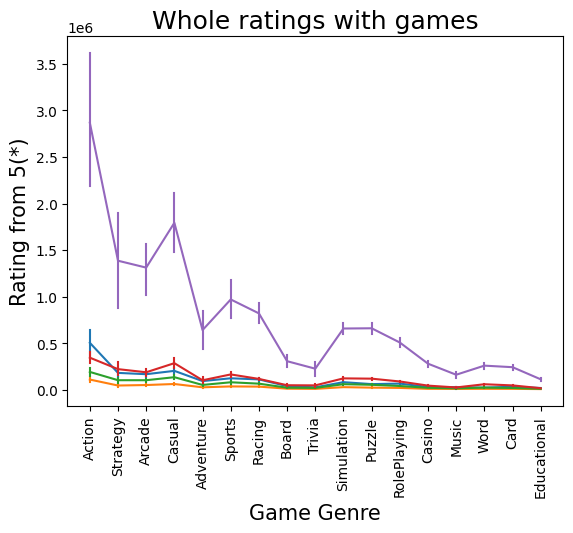

In [41]:
fig, ax = plt.subplots()
sns.lineplot(y = play['1_star_rating'], x = play['Category'],err_style="bars", ci=68) #blue
sns.lineplot(y = play['2_star_rating'], x = play['Category'],err_style="bars", ci=68) #yellow
sns.lineplot(y = play['3_star_rating'], x = play['Category'],err_style="bars", ci=68) #green
sns.lineplot(y = play['4_star_rating'], x = play['Category'],err_style="bars", ci=68) #red
sns.lineplot(y = play['5_star_rating'], x = play['Category'],err_style="bars", ci=68) #purple
plt.xticks(rotation=90)
plt.xlabel("Game Genre", size = 15)
plt.ylabel("Rating from 5(*)", size = 15)
plt.title("Whole ratings with games", size = 18)
plt.show()
warnings.filterwarnings('ignore')

### What is the user preference for downloading paid or free games from the Google Play Store?

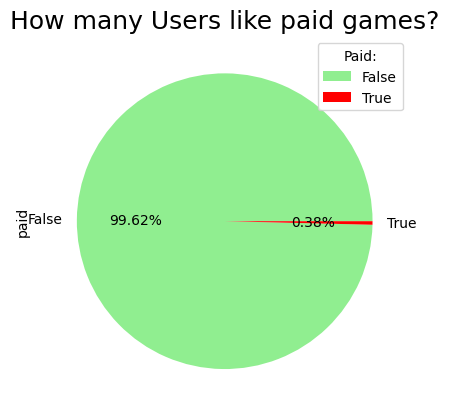

<Figure size 640x480 with 0 Axes>

In [42]:
fig, ax = plt.subplots()
play.paid.value_counts(normalize=True).plot.pie(autopct='%.2f%%', colors = ['lightgreen', 'red'])
plt.title('How many Users like paid games?')
plt.legend(title = "Paid:")
plt.title('How many Users like paid games?', size = 18)
plt.show()
plt.savefig("pieplot.png")

<AxesSubplot: xlabel='price', ylabel='title'>

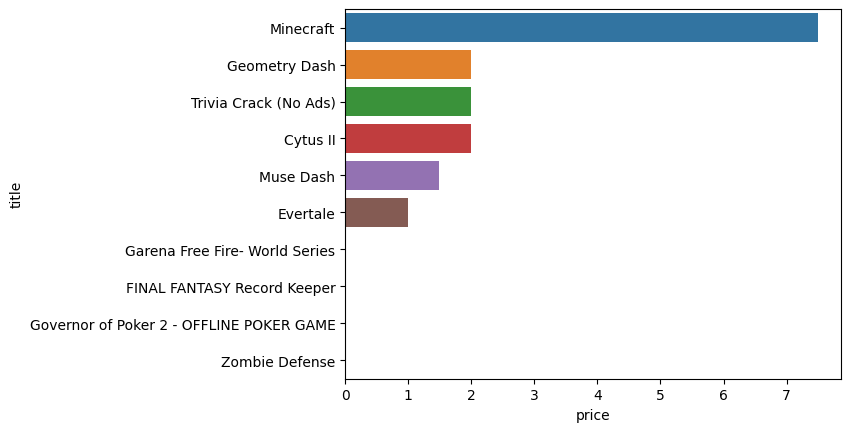

In [48]:
price=play.sort_values('price',ascending=False).head(10)
sns.barplot(y='title',x='price',data=price)

### Which game genre boasts the highest installation count?

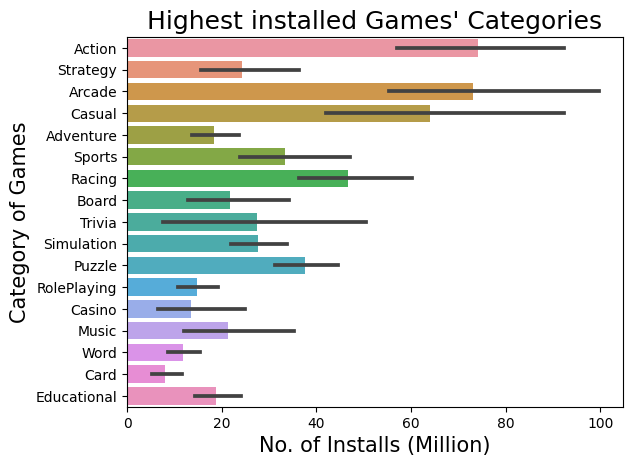

<Figure size 640x480 with 0 Axes>

In [44]:
fig, ax = plt.subplots()
sns.barplot(x = play['install_million'], y = play['Category'])
plt.ylabel("Category of Games", size = 15)
plt.xlabel("No. of Installs (Million)", size = 15)
plt.title("Highest installed Games' Categories", size = 18)
plt.show()
plt.savefig("barplot.png")

### What genre experienced the highest growth in installations 60 days after its launch?

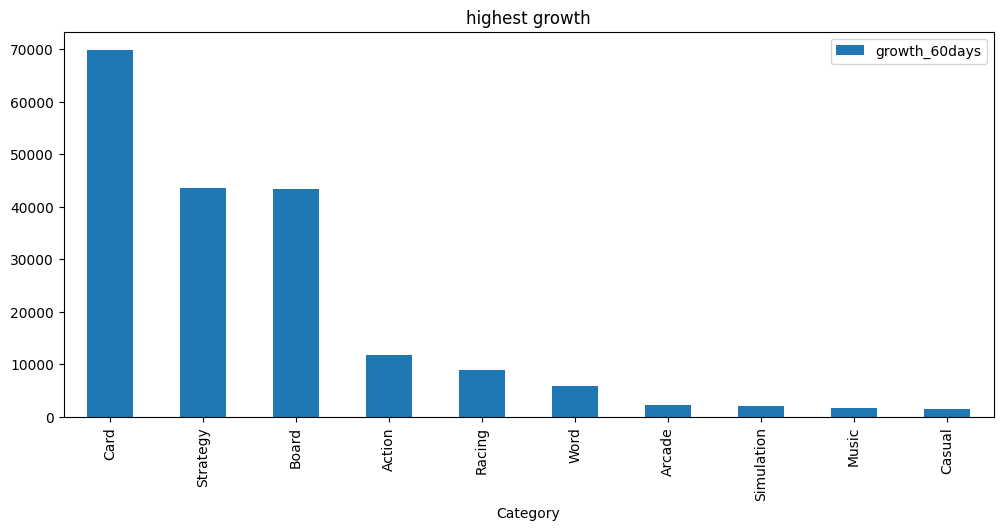

In [51]:
growth=play.groupby('Category')[['growth_60days']].sum()
highest_growth=growth.sort_values('growth_60days',ascending=False).head(10).plot.bar(title='highest growth',figsize=(12,5));


[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

## Insights

### Rapidly Growing Game Categories

In [54]:
highest_growth=growth.sort_values('growth_60days',ascending=False).head(10)
highest_growth

,growth_60days
Category,
Card,69861.7
Strategy,43538.0
Board,43296.9
Action,11823.6
Racing,8896.3
Word,5762.8
Arcade,2177.7
Simulation,2009.8
Music,1695.5


This reveals that the market for card games is experiencing an exceptionally rapid growth.

### Game Categories with High Average Ratings

In [55]:
play.sort_values("title",inplace =True)
play.drop_duplicates(subset="title",keep='first',inplace=True)
average_rating = play.groupby('Category')[['avg_rating']].sum()/100
average_rating

,avg_rating
Category,
Action,3.89
Adventure,3.66
Arcade,3.80
Board,3.67
Card,2.95
Casino,3.64
Casual,3.79
Educational,3.69
Music,3.44


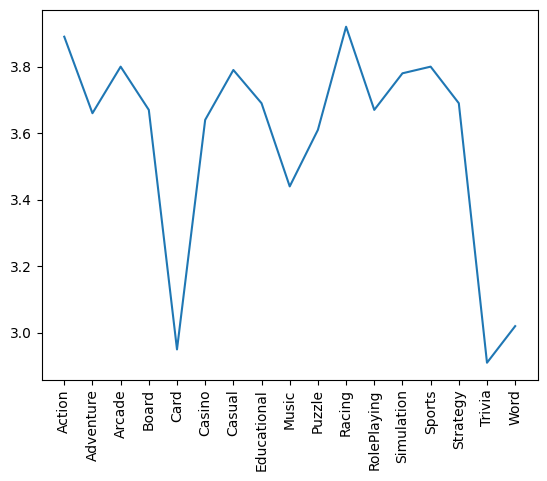

In [60]:
plt.plot(average_rating)
plt.xticks(rotation="vertical")
plt.show()

Therefore, we can infer that the racing games category exhibits a notably high average rating.

### Highly Popular Game Categories

In [61]:
trend = play.groupby('Category')[['install_million']].sum().head(10)
trend

,install_million
Category,
Action,7410
Adventure,1753
Arcade,7091
Board,2032
Card,607
Casino,1237
Casual,6087
Educational,1776
Music,1932


Based on the above observations, it is evident that action games are gaining significant popularity in comparison to other game genres.

###  Game with the Highest Percentage of 5-Star Ratings

In [63]:
play['percentage']=(play['5_star_rating']/play['total_ratings'])*100
sorted_df=play.sort_values('percentage',ascending=False)
display(sorted_df[sorted_df.percentage<=100])

,title,total_ratings,install_million,avg_rating,growth_30days,growth_60days,Category,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price,paid,percentage
353,Indy Cat for VK,998983,5,4,0.0,0.0,Puzzle,931620,35619,10710,5345,15686,0.0,False,93.256842
1170,Free Slot Machines with Bonus Games!,207326,5,4,0.2,0.5,Casino,189655,7941,3925,1388,4415,0.0,False,91.476708
1361,Word Nut: Word Puzzle Games & Crosswords,109530,5,4,1.9,4.1,Word,99987,4766,1469,953,2353,0.0,False,91.287319
1109,Slots: Epic Jackpot Slots Games Free & Casino ...,257492,1,4,0.9,2.0,Board,234050,11006,4005,1777,6651,0.0,False,90.896028
811,Word Collect - Free Word Games,436327,10,4,3.1,7.2,Word,395758,20443,5961,3503,10659,0.0,False,90.702157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,LINE PokoPoko - Play with POKOTA! Free puzzler!,414626,10,3,0.7,1.3,Puzzle,158839,88968,76250,27016,63551,0.0,False,38.308982
1557,Piano Music Tiles 2 - Free Music Games,37291,5,3,3.2,6.8,Music,13975,3720,3521,3043,13030,0.0,False,37.475530
1479,Atriviate (Online Trivia),64624,5,3,0.0,0.1,Trivia,24061,16120,9210,4560,10670,0.0,False,37.232298
1122,Futsal Football 2,243214,10,2,0.0,0.0,Sports,84461,12107,13275,8344,125025,0.0,False,34.727031


Based on the information provided earlier, it can be concluded that the puzzle game titled "Indy Cat for VK" has a substantial number of 5-star ratings.

### Market Dominance: Paid or Free Games – Which Holds the High Ground?

In [64]:
price

,title,total_ratings,install_million,avg_rating,growth_30days,growth_60days,Category,5_star_rating,4_star_rating,3_star_rating,2_star_rating,1_star_rating,price,paid
71,Minecraft,4100452,10,4,234.3,2.4,Arcade,3324435,317144,135048,65677,258146,7.49,True
460,Geometry Dash,777941,1,4,0.7,1.3,Arcade,636912,73308,24749,9026,33945,1.99,True
1455,Trivia Crack (No Ads),75712,500,4,0.7,1.4,Trivia,56454,12628,3284,1088,2256,1.99,True
1353,Cytus II,111679,1,4,0.8,1.7,Music,88842,11945,4620,1947,4322,1.99,True
1562,Muse Dash,34140,100,4,768.5,6.7,Music,29210,2774,718,429,1007,1.49,True
1018,Evertale,311126,1,4,725.3,5.1,RolePlaying,222761,32884,15877,9298,30304,0.99,True
0,Garena Free Fire- World Series,86273129,500,4,2.1,6.9,Action,63546766,4949507,3158756,2122183,12495915,0.00,False
1041,FINAL FANTASY Record Keeper,297438,1,4,0.0,0.0,RolePlaying,139743,90255,40327,10029,17082,0.00,False
1048,Governor of Poker 2 - OFFLINE POKER GAME,290160,5,4,0.1,0.3,Card,181785,42321,20426,10233,35392,0.00,False
1047,Zombie Defense,293059,10,4,0.1,490.9,Strategy,203722,40179,20334,7460,21362,0.00,False


Observing the data, it's evident that only seven paid games secured a position in the top 100 category-wise list. This leads to a clear conclusion: Free games dominate a significant share of the market compared to their paid counterparts.

[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

### Conclusion

<p style='text-align: justify;'>Examining the dataset from the Google Play Store yielded numerous observations regarding trends and patterns in apps. It became clear that popularity and pricing of apps exhibit differences among various categories and genres.

In summary, the data analysis indicates that the dominance of free games over their paid counterparts is evident, with only seven paid games securing positions in the top 100 category-wise list. Additionally, the puzzle game "Indy Cat for VK" stands out with a substantial number of 5-star ratings, suggesting a high level of user satisfaction. This extends to the racing games category, which exhibits a notably high average rating.

Furthermore, the data reveals a rapid growth in the market for card games. Leveraging this insight, the combination of racing and action games into a single category, such as an action racing game, could attract users who lean towards action-oriented gameplay.

Overall, the gaming industry's ability to offer free games has a considerable impact, overshadowing the influence of paid games in the market. 

These discoveries can offer valuable guidance to app developers and marketers as they plan their app design, development, and pricing strategies.</p>

[<a href="#An-evaluation-of-a-PlayStore-Game-Titles">Back to Top</a>]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dee597ce-5fde-4185-be85-edc0302c68a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>